In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
pd.set_option('display.max_columns', 100)

## Data Loading

In [3]:
df = pd.read_csv('data/diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [4]:
df.loc[:, 'fluor_color':'total_sales_price'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   fluor_color                  219703 non-null  object
 1   fluor_intensity              76212 non-null   object
 2   fancy_color_dominant_color   219703 non-null  object
 3   fancy_color_secondary_color  219703 non-null  object
 4   fancy_color_overtone         218053 non-null  object
 5   fancy_color_intensity        219703 non-null  object
 6   total_sales_price            219703 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.7+ MB


The fluor_intensity is the only column with null values.

# Data Preprocessing

In [5]:
df.isnull().sum()   

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [7]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

3880


In [8]:
df.reset_index()

,index,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215818,219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
215819,219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
215820,219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
215821,219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [9]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [10]:
df.shape

(215823, 25)

In [11]:
categorical_df = df.copy()

## EDA and Data Cleaning

### Understanding the data

In [12]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
print(categorical_columns)

['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [13]:
df['carat_weight'].describe()

count    215823.000000
mean          0.757719
std           0.844707
min           0.080000
25%           0.310000
50%           0.500000
75%           1.000000
max          19.350000
Name: carat_weight, dtype: float64

In [14]:
fig = px.box(df, y='carat_weight')
fig.show()

In [15]:
# calculating the number of outliers

print(df[df['carat_weight'] > 2.03].shape[0])
print(df[df['carat_weight'] > 2.03].shape[0]/df.shape[0])

9336
0.04325766947915653


From the box plot, we can observe that the carat weights range from 0.08 to 19.35. The majority of the carat weights fall between approximately 0.08 and 2.03, with a median value around 0.5. There are 9447(4.30%) outliers with carat weights above 2.03.


# ==========================================================================================

In [17]:
df['cut'].value_counts(dropna=False)

cut
Round               154793
Oval                 13816
Emerald              10987
Pear                  9822
Princess              6986
Radiant               5584
Heart                 4748
Cushion Modified      3956
Marquise              2914
Asscher               1688
Cushion                529
Name: count, dtype: int64

In [18]:
# Add unordered category
# df['cut_category'] = df['cut'].astype('category')

Understanding different cuts:

<!---

Emerald cut diamonds have 57 facets, while radiant diamonds have 70. The higher number of facets on radiant diamonds allow for more sparkle to shine through when compared to emerald cut diamonds. The facet arrangement of emerald cut diamonds allows imperfections to be seen more easily than in radiant cut diamonds.

Cushion cut diamonds feature soft, rounded edges which lend to a more romantic feel. In contrast to the understated romance of a cushion cut, princess cut diamonds offer a more modern and geometric look to engagement ring settings.

Cushion cut diamonds feature soft, rounded edges which lend to a more romantic feel. In contrast to the understated romance of a cushion cut, princess cut diamonds offer a more modern and geometric look to engagement ring settings.

The cushion modified cut has more fire while the cushion brilliant cut has more brilliance. 

Brilliance vs Fire:
- The brilliance refers to the brightness of the diamond as you can see here. Without it, a diamond will appear dull.

- Diamond fire refers to the white light that is separated into its seven visible colors. This gives a diamond its life. The more the diamond is able to display its fire, the better the quality of the cut

- Do not go below a good cut on the cut scale as a diamond below this grade will appear dull and will not have much brilliance, fire and scintillation

- With the step cut, the stone will have fewer facets and the end goal is to make the stone as clear as possible. It is not the type of diamond that is renowned for brightness. That said the step cuts have plenty of fire.

- Unlike brilliance which is the colorless light from a diamond, fire is the colored light.

To have a better understanding of the diamond’s brilliance, let’s take a look at the critical angle. This is the maximum angle by which light can bend and leave a material. In a diamond, this critical angle is 24.5 degrees.

- This is one more reason to pay special attention to the cut grade of a diamond. The GIA has a scale that ranges between Excellent to Poor cut. The best cut diamonds with the most fire and brilliance will have an excellent, very good or good cut grade.

- The inclusions inside the stone will get in the way of light that has been refracted. You can judge the quality of stone not just by physically looking for inclusions and imperfections but by the fire. Stones that are a bit low on the clarity scale and have inclusions will have less fire while more clear stones will have more fire.

- While diamonds can have a tint of color, generally the clearer the stone the more fire it will have. This is because light dispersion is maximized in whiter diamonds more than in colored diamonds.

Due to their rarity and wasteful cutting process, Asscher cuts are typically about 10% more expensive than other diamond shapes of the same carat weight, except the round brilliant.


-->

# ==============================================================================================

In [19]:
# function to create ordered columns of category dtype

def create_categories(col, labels):
    df[col+'_category'] = df[col].astype('category')
    df[col+'_category'] = df[col+'_category'].cat.set_categories(
        labels , ordered=True
    )

In [20]:
df['color'].value_counts()

color
E          32502
F          31021
D          30491
G          28613
H          25430
I          21876
J          16658
K          11555
unknown     9104
L           5578
M           2995
Name: count, dtype: int64

In [21]:
# Add ordered category

df['color_category'] = df['color'].astype('category')
df.color_category = df.color_category.cat.set_categories(
    ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'], ordered=True)

The 23 color grades on the GIA Color Scale (or diamond color chart) are subdivided into five subcategories, which are: colorless (D-F); near colorless (G-J); faint (K-M); very light (N-R); and light (S-Z).

In [22]:
print(df.loc[df['fancy_color_dominant_color'] != 'unknown'].shape[0])
df['fancy_color_dominant_color'].value_counts()

9106


fancy_color_dominant_color
unknown      206717
Yellow         6430
Pink           1369
Brown           531
Green           302
Orange          270
Purple           76
Gray             66
Blue             38
Chameleon        12
Black             6
Red               4
Other             2
Name: count, dtype: int64

Changing the 2 Other categories to unknown:

In [23]:
df['fancy_color_dominant_color'].replace('Other', 'unknown', inplace=True)

C:\Users\17802\AppData\Local\Temp\ipykernel_24876\3326054854.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [24]:
print(df.loc[df['fancy_color_intensity'] != 'unknown'].shape[0])
df['fancy_color_intensity'].value_counts()

9104


fancy_color_intensity
unknown          206719
Fancy              3429
Fancy Intense      1938
Fancy Light        1264
Fancy Deep          772
Fancy Vivid         709
Light               317
Faint               238
Fancy Dark          238
Very Light          199
Name: count, dtype: int64

On GIA Colored Diamond Grading Reports, colored diamonds are graded in order of increasing color strength, from Faint, Very Light, Light, Fancy Light and Fancy to Fancy Intense, Fancy Vivid, Fancy Dark and Fancy Deep

In [25]:
df['fancy_color_intensity_category'] = df['fancy_color_intensity'].astype('category')
df.fancy_color_intensity_category = df.fancy_color_intensity_category.cat.set_categories(
    ['Faint', 'Very Light', 'Light', 'Fancy Light', 'Fancy', 'Fancy Intense', 'Fancy Vivid', 'Fancy Dark', 'Fancy Deep'], ordered=True)

In [26]:
df['fancy_color_overtone'].fillna('unknown', inplace=True)
df['fancy_color_overtone'].value_counts(dropna=False)

C:\Users\17802\AppData\Local\Temp\ipykernel_24876\2314200303.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





fancy_color_overtone
unknown      215436
Brownish        122
Yellowish        78
Orangey          54
Pinkish          51
Greenish         47
Purplish         34
Grayish           1
Name: count, dtype: int64

There are 9106 diamonds with a fancy color. And the Chameleon, Black and Red diamonds are the rarest among natural diamonds.

Lets double check that there aren't any diamonds with a secondary fancy color without a dominant color.

In [27]:
df.loc[(df['fancy_color_dominant_color']=='unknown') & (df['fancy_color_secondary_color']!='unknown')]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category


Checking the same for fancy color overtone.

In [28]:
condition = (df['fancy_color_dominant_color']=='unknown') & (df['fancy_color_overtone']!='unknown')
df.loc[condition]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category
9410,Round,K,VVS2,0.30,Excellent,GIA,Excellent,Excellent,unknown,unknown,unknown,62.7,56.0,4.25,4.29,2.68,unknown,unknown,unknown,Medium,unknown,unknown,Yellowish,unknown,624,K,NaN
152987,Pear,D,SI1,0.77,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,69.0,57.0,7.87,4.88,3.37,STK,XTK,unknown,NaN,unknown,unknown,Greenish,unknown,3882,D,NaN
154700,Pear,D,VS2,0.73,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,69.9,54.0,7.40,4.89,3.42,TK,XTK,unknown,NaN,unknown,unknown,Greenish,unknown,4119,D,NaN
160454,Round,K,VS2,1.10,Excellent,IGI,Excellent,Excellent,unknown,unknown,unknown,63.3,56.5,6.46,6.52,4.11,STK,STK,unknown,NaN,unknown,unknown,Brownish,unknown,4754,K,NaN
219214,Round,D,VVS2,5.05,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,59.0,58.0,11.27,11.30,6.66,unknown,unknown,Blue,Strong,unknown,unknown,Yellowish,unknown,233311,D,NaN
219250,Round,E,VVS1,5.49,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.6,61.0,11.24,11.32,6.95,unknown,unknown,Blue,Strong,unknown,unknown,Yellowish,unknown,245952,E,NaN


All the above are colorless or faint diamonds, based on the color category. Because D and E are supposed to be colorless, we'll change the overtone to unknown. K colored diamonds are slightly tinted so we don't need to change the values. - https://essiluxgroup.com/knowledge-base/diamond-color.html

In [30]:
df.loc[(df.color.isin(['D', 'E'])) & (condition), 'fancy_color_overtone'] = 'unknown'
df.loc[condition]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category
9410,Round,K,VVS2,0.30,Excellent,GIA,Excellent,Excellent,unknown,unknown,unknown,62.7,56.0,4.25,4.29,2.68,unknown,unknown,unknown,Medium,unknown,unknown,Yellowish,unknown,624,K,NaN
152987,Pear,D,SI1,0.77,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,69.0,57.0,7.87,4.88,3.37,STK,XTK,unknown,NaN,unknown,unknown,unknown,unknown,3882,D,NaN
154700,Pear,D,VS2,0.73,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,69.9,54.0,7.40,4.89,3.42,TK,XTK,unknown,NaN,unknown,unknown,unknown,unknown,4119,D,NaN
160454,Round,K,VS2,1.10,Excellent,IGI,Excellent,Excellent,unknown,unknown,unknown,63.3,56.5,6.46,6.52,4.11,STK,STK,unknown,NaN,unknown,unknown,Brownish,unknown,4754,K,NaN
219214,Round,D,VVS2,5.05,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,59.0,58.0,11.27,11.30,6.66,unknown,unknown,Blue,Strong,unknown,unknown,unknown,unknown,233311,D,NaN
219250,Round,E,VVS1,5.49,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.6,61.0,11.24,11.32,6.95,unknown,unknown,Blue,Strong,unknown,unknown,unknown,unknown,245952,E,NaN


In [31]:
def color_condition(color):
    if color in ['D', 'E', 'F']:
        return 'colorless'
    elif color in ['G', 'H', 'I', 'J']:
        return 'near colorless'
    elif color in ['K', 'L', 'M']:
        return 'faint'
    elif color in ['N', 'O', 'P', 'Q', 'R']:
        return 'very light' 
    elif color in ['S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
        return 'light'
    else:
        return 'unknown'

df['color_scale'] = df['color'].apply(color_condition)
df.loc[(df['fancy_color_dominant_color']!='unknown')&(df['color']=='unknown'), 'color_scale'] = 'fancy'
df['color_scale'].value_counts() 

color_scale
colorless         94014
near colorless    92577
faint             20128
fancy              9104
Name: count, dtype: int64

# ===============================================================================================

In [32]:
df['clarity'].value_counts()

clarity
SI1     38207
VS2     37494
VS1     36077
SI2     30813
VVS2    28307
VVS1    27239
IF       9718
I1       6930
I2        938
I3         91
SI3         9
Name: count, dtype: int64

Understanding clarity:
<!---
The GIA Diamond Clarity Scale has 6 categories, some of which are divided, for a total of 11 specific grades.

- Flawless (FL) No inclusions and no blemishes visible under 10x magnification
- Internally Flawless (IF) No inclusions visible under 10x magnification
- Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
- Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor
- Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
- Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance

WHAT CAUSES INCLUSIONS?
Small crystals can become trapped in a diamond when it’s forming. Sometimes as a crystal grows, it can develop irregularities in its atomic structure. The size, position and visibility of inclusions can have a significant impact on diamond clarity.

SI3 is a diamond clarity rating used by some labs to indicate a clarity that falls between the Slightly Included and Included ranges. It is important to note that the GIA does not have an SI3 rating and it is our expert opinion that you should avoid these diamonds. These diamonds are almost always diamonds that have been given an I1 or worse rating by the GIA and then submitted to another lab with lower standards and “upgraded” to an SI3. An SI3-rated diamond will, in all likelihood, not be eye-clean and will contain obvious blemishes visible to the naked eye. We don’t consider these diamonds to be a good value for your money.
>

In [33]:
df[df['clarity'] == 'SI3']

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category,color_scale
130,Round,H,SI3,0.23,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,284,H,NaN,near colorless
149,Round,H,SI3,0.24,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,296,H,NaN,near colorless
171,Round,H,SI3,0.25,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,308,H,NaN,near colorless
212,Round,H,SI3,0.26,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,320,H,NaN,near colorless
228,Round,F,SI3,0.24,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,324,F,NaN,colorless
304,Round,H,SI3,0.27,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,334,H,NaN,near colorless
405,Round,H,SI3,0.29,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,358,H,NaN,near colorless
9791,Round,G,SI3,0.30,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,630,G,NaN,near colorless
19407,Round,F,SI3,0.32,Very Good,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,0.0,0.0,0.0,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,720,F,NaN,colorless


"You see, if you were to take the same exact (SI3) diamond graded by EGL to GIA, it would most likely receive an I1 or worse grade at GIA. It’s no wonder that GIA or any other major labs around the world won’t recognize SI3 as a clarity grade." - https://beyond4cs.com/clarity/si3-grading/


"IGI inflated the qualities in eight of the ten possible grades"

"IGI has been more lenient in its grading standards than GIA"

We'll do IGI vs GIA comparisons later in the notebook.

In [34]:
df['clarity'] = df['clarity'].replace('SI3', 'I1')

In [35]:
df['clarity'].value_counts()

clarity
SI1     38207
VS2     37494
VS1     36077
SI2     30813
VVS2    28307
VVS1    27239
IF       9718
I1       6939
I2        938
I3         91
Name: count, dtype: int64

In [36]:
df['clarity_category'] = df['clarity'].astype('category')
df['clarity_category']= df.clarity_category.cat.set_categories(
    ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], ordered=True
)
df.clarity_category

0         VVS2
1         VVS2
2         VVS2
3         VVS2
4         VVS2
          ... 
219698     VS1
219699     VS2
219700     VS1
219701     SI2
219702    VVS2
Name: clarity_category, Length: 215823, dtype: category
Categories (10, object): ['I3' < 'I2' < 'I1' < 'SI2' ... 'VS1' < 'VVS2' < 'VVS1' < 'IF']

In [37]:
def clarity_condition(clarity):
    if clarity in ['VVS1', 'VVS2']:
        return 'VVS'
    elif clarity in ['VS1', 'VS2']:
        return 'VS'
    elif clarity in ['SI1', 'SI2']:
        return 'SI'
    elif clarity in ['I1', 'I2', 'I3']:
        return 'I'
    else:
        return 'IF'


df['clarity_scale'] = df['clarity'].apply(clarity_condition)
df['clarity_scale'].value_counts()

clarity_scale
VS     73571
SI     69020
VVS    55546
IF      9718
I       7968
Name: count, dtype: int64

In [38]:
df['clarity_scale_category'] = df['clarity_scale'].astype('category') 
df['clarity_scale_category'] = df.clarity_scale_category.cat.set_categories(
    ['I', 'SI', 'VS', 'VVS', 'IF'], ordered=True
)

# =============================================================================================

In [39]:
df['cut_quality'].value_counts()

cut_quality
Excellent    122346
unknown       60250
Very Good     33193
Good             28
Fair              5
Ideal             1
Name: count, dtype: int64

In [40]:
df['cut_quality_category'] = df['cut_quality'].astype('category')
df['cut_quality_category'] = df.cut_quality_category.cat.set_categories(
    ['Fair', 'Good', 'Very Good', 'Excellent', 'Ideal'], ordered=True
)

# ================================================================

In [41]:
df['lab'].value_counts()

lab
GIA    197217
IGI     15317
HRD      3289
Name: count, dtype: int64

# ======================================================================================

In [42]:
df['culet_size'].value_counts()

culet_size
N          131006
unknown     82854
VS           1335
S             398
M             150
L              58
SL             14
EL              4
VL              4
Name: count, dtype: int64

In [43]:
df['culet_size_category'] = df['culet_size'].astype('category')
df['culet_size_category'] = df.culet_size_category.cat.set_categories(
    ['EL', 'VL', 'SL', 'L', 'M', 'S', 'VS', 'N'], ordered=True
)

In [44]:
df['culet_condition'].value_counts()

culet_condition
unknown    200509
Pointed     15288
Chipped        18
Abraded         8
Name: count, dtype: int64

Ideally, a culet should be so small it appears as a pinpoint when viewed from the top, categorized as “None” or “Small” in grading reports. A larger culet can create a visual “hole” or dark spot at the bottom of the diamond, detracting from its overall brilliance and appearance.

In GIA's International Diamond Grading System™, culet size is described as None, Very Small, Small, Medium, Slightly Large, Large, Very Large, or Extremely Large.

# ================================================================================

In [45]:
print(df['girdle_min'].value_counts())
print(df['girdle_max'].value_counts())

girdle_min
unknown    80330
M          73884
STK        26223
TN         16654
TK         10329
VTK         4463
XTK         1978
VTN         1646
XTN          292
STN           24
Name: count, dtype: int64
girdle_max
unknown    81193
STK        69983
TK         25100
M          17788
VTK        12620
XTK         7626
TN          1356
VTN          111
XTN           34
STN           12
Name: count, dtype: int64


Ideal girdle thickness should range between Very Thin to Thick.

Abbreviations For Girdle thickness:

- EXTN, ET, XT, EXN = Extremely Thin
- VTN, VT, VETN = Very Thin
- T, TN, TH = Thin
- M, ME, MD = Medium
- STK, ST, SLTK, SLTH = Slightly Thick
- T, TK, TH = Thick
- VTK, VTH, VETK, VET = Very Thick
- ET, EXTK, XT, XTK = Extremely Thick
- F, FA, FAC = Faceted
- S, SM = Smooth
- P, PO = Polished

In [46]:
girdle_thickness_scale = ['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK']

create_categories('girdle_min', girdle_thickness_scale)
create_categories('girdle_max', girdle_thickness_scale)

In [47]:
df['depth_percent'].describe()

count    215823.000000
mean         61.728223
std           9.803163
min           0.000000
25%          61.200000
50%          62.400000
75%          63.500000
max          98.700000
Name: depth_percent, dtype: float64

Depth and Table percent:
<!---
Graders calculate it by dividing the average girdle diameter (the width of the diamond) by the table to culet length (or height) of the diamond and multiplying it by one hundred. Ideally, the total depth percentage should range from 57.5 to 63%.

For a round diamond, an ideal depth percentage is between 59 and 62.6 percent and for a princess cut look for a diamond with a depth of 68 to 74 percent.

The ideal table percentage varies by shape. For a round cut diamond, an excellent table range is 54 and 57 and for a princess cut a table range of 69 to 75 percent of the width of the diamond is recommended.

TABLE:
- the table of a diamond is graded from poor to excellent, depending on its quality.
- For a round cut diamond, an excellent table range is 54 and 57 percent. 
A very good cut can have the table of 52 to 53 percent or 58 to 60 percent.
- For a princess cut diamond, an ideal table takes up 69 to 75 percent of the width of the diamond. A very good cut can be between 56 to 67 percent or 75 to 76 percent.

- For an asscher cut or emerald cut diamond, an ideal table takes up 60 to 68 percent of the width of the diamond. 
- For an oval cut diamond, an ideal table is between 53 and 63 percent. 
- For a pear shape diamond, an ideal table size is 53 to 65 percent.
- For a radiant cut diamond, an ideal table size is between 61 to 69 percent. 
- For a heart shape diamond, check for an ideal table that’s between 56 and 62 percent of the diamond’s total width.
- For a marquise diamond, an ideal table takes up 53 to 63 percent of the width of the diamond. A very good cut can be between 52 and 64 to 65 percent.

DEPTH:
- For a round diamond, an ideal depth percentage is between 59 and 62.6 percent
- For a princess cut diamond, choose a diamond with an ideal depth of 68 to 74 percent.
- For a cushion cut diamond, look for an ideal depth that’s between 61 and 68 percent.
- For an Asscher or Emerald cut diamond, an ideal depth is between 61 to 68 percent.
- For an oval cut diamond, an ideal depth is less than 68 percent.
- For a pear shape diamond, an ideal diamond’s depth is less than 68 percent.
- For a radiant cut diamond, an ideal depth is less than 67 percent.
- For a heart shape diamond, make sure to choose a diamond with an ideal depth of 56 to 62 percent.
- For a marquise diamond, an ideal depth range is between 58 and 62 percent of the total width of the diamond, while a very good cut will have a depth range of 56 to 57.9 or 62.1 to 66 percent.
>

# ========================================================================================

In [48]:
df['eye_clean'].value_counts()

eye_clean
unknown       153285
Yes            61682
Borderline       515
E1               300
No                41
Name: count, dtype: int64

In [49]:
df['eye_clean_category'] = df['eye_clean'].astype('category')
df['eye_clean_category'] = df.eye_clean_category.cat.set_categories(
    ['No', 'Borderline', 'E1', 'Yes'], ordered=True)

The term “eye-clean” is not an official grading; rather, it’s a subjective assessment that can vary from person to person based on their eyesight and the lighting conditions.

If it’s a VVS, FL or IF diamond, you’re paying too much for clarity (unless you’re going for a diamond over 3 carats, then a VVS might be your best value). These are the higher grades, and you can almost always find an eye-clean diamond for less. On the other hand, I1-I3 diamonds are simply too included to be eye-clean in any carat weight above 0.4ct.

While a better clarity graded diamond might seem like the best choice, it isn’t worth the cost. A higher graded diamond will look identical to a lower graded diamond as long as they’re both eye-clean.

- Round Cut and Princess Cut: For 2 carat diamonds and smaller, VS2 and SI1 diamonds are almost always eye-clean (sometimes even SI2s for a round cut). For diamonds over 2 carats, VS1s and VS2s are eye-clean. When your carat weight gets over 3 carats, you may have to look at VVS2 diamonds to get an eye-clean stone. The bigger the diamond (carat weight can play a role), the easier it is to see imperfections.

- Cushion Cut, Oval Cut, Radiant Cut, Marquise and Pear-Shaped: These diamond shapes hide inclusions better than others. Opt for an SI1 or SI2 for the best value.

- Heart-Shaped: VS2 and SI1 heart shape diamonds will be eye-clean and offer you the most for your budget. They hide inclusions better than Round Cuts and Princess Cuts, but not as well as shapes like the cushion cut.

- Emerald cut, asscher cut and baguette: It’s easier to see imperfections in step cut diamonds. Aim for a VS2 in these shapes for the best value.

# ==================================================================================

In [50]:
print(df['polish'].value_counts(), '\n')
print(df['symmetry'].value_counts(), '\n')
print(df['fluor_intensity'].value_counts(), '\n')
print(df['fluor_color'].value_counts())

polish
Excellent    172877
Very Good     41377
Good           1560
Fair              7
Poor              2
Name: count, dtype: int64 

symmetry
Excellent    129526
Very Good     81383
Good           4583
Fair            324
Poor              7
Name: count, dtype: int64 

fluor_intensity
Faint          37869
Medium         20344
Strong         13063
Very Slight     2618
Very Strong     1078
unknown          128
Slight            12
Name: count, dtype: int64 

fluor_color
unknown    200111
Blue        15205
Yellow        400
Green          55
White          42
Orange         10
Name: count, dtype: int64


In [51]:
symmetry_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

create_categories('polish', symmetry_labels)
create_categories('symmetry', symmetry_labels)

When diamonds have Slight or Faint Fluorescence from GIA, for example, they don’t appear cloudy. In fact, the slight fluorescence can make the diamond appear more white. But when fluorescence makes the diamond hazy, the stone is less transparent. Light won’t reflect as well and the diamond won’t be as clear or beautiful. 

Here are explanations of when fluorescence can lower a diamond’s quality:

- Strong or very strong blue fluorescence: These diamonds usually appear hazy or cloudy.
- Medium blue fluorescence with a high color grade (G or better): These diamonds also usually appear milky or hazy.
- D color, E color and F color diamonds with any fluorescence:
Diamonds in the colorless range (D-F) don’t benefit from fluorescence. They’re actually less desirable and therefore less valuable, which lowers the diamond price per carat.

# ====================================================================================

In [52]:

df['total_sales_price'].describe()

count    2.158230e+05
mean     6.940346e+03
std      2.603431e+04
min      2.000000e+02
25%      9.580000e+02
50%      1.980000e+03
75%      5.292000e+03
max      1.449881e+06
Name: total_sales_price, dtype: float64

# ========================================================================

## Visualizations

### 1. Price vs Carat Weight

In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [54]:
temp_df = df[['carat_weight', 'total_sales_price']]
carat_df = temp_df.groupby('carat_weight').mean().reset_index()

In [55]:
temp_df = df[(df.color_scale.isin(['colorless', 'near colorless', 'faint']))][['carat_weight', 'total_sales_price']]
carat_colorless_df = temp_df.groupby('carat_weight').mean().reset_index()

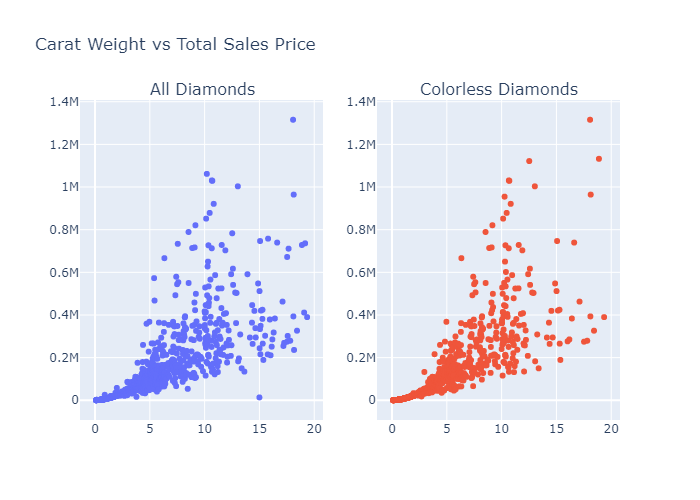

In [56]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('All Diamonds', 'Colorless Diamonds'))

fig.add_trace(
    go.Scatter(x=carat_df['carat_weight'], y=carat_df['total_sales_price'], 
               mode='markers', name='All Diamonds'), 
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=carat_colorless_df['carat_weight'], y=carat_colorless_df['total_sales_price'], 
               mode='markers', name='Colorless Diamonds'), 
    row=1, col=2
)

fig.update_layout(title='Carat Weight vs Total Sales Price', showlegend=False)
fig.show('png')


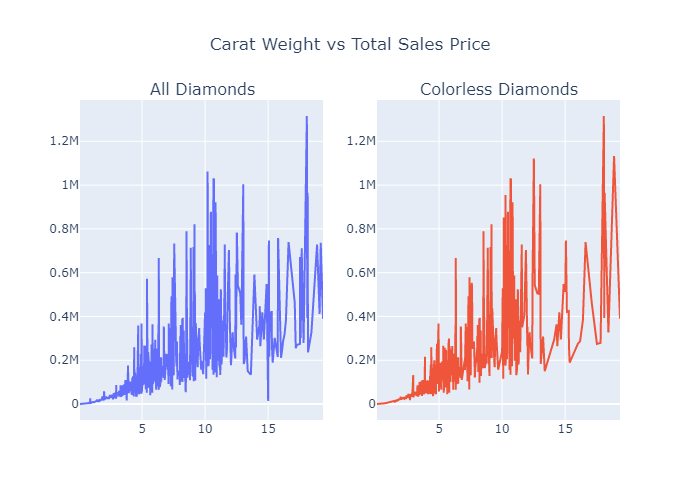

In [57]:
fig2 = make_subplots(rows=1, cols=2, subplot_titles=('All Diamonds', 'Colorless Diamonds'))

fig2.add_trace(
    go.Scatter(x=carat_df['carat_weight'], y=carat_df['total_sales_price'],
               mode='lines'), 
    row=1, col=1
)

fig2.add_trace(
    go.Scatter(x=carat_colorless_df['carat_weight'], y=carat_colorless_df['total_sales_price'],
            mode='lines'), 
    row=1, col=2
)

fig2.update_layout(title='Carat Weight vs Total Sales Price', showlegend=False, title_x=0.5)
fig2.show('png')

Though there are still upward and downward spikes in the colorless diamonds, the prices are more consistent than the dataset that includes dimonds of a fancy color.

### 2. Analysing the Median Carat Weight of 0.5

In [58]:
carat_df[carat_df['carat_weight']==0.5]

,carat_weight,total_sales_price
42,0.5,2386.140983


In [59]:
cttw_df = df.groupby('carat_weight')
median_cttw = cttw_df.get_group(0.5).reset_index()
median_cttw.head()

,index,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category,color_scale,clarity_category,clarity_scale,clarity_scale_category,cut_quality_category,culet_size_category,girdle_min_category,girdle_max_category,eye_clean_category,polish_category,symmetry_category
0,1022,Oval,M,VS2,0.5,unknown,GIA,Very Good,Excellent,unknown,N,unknown,66.8,56.0,5.85,4.42,2.95,TK,VTK,Blue,Strong,unknown,unknown,unknown,unknown,480,M,NaN,faint,VS2,VS,VS,NaN,N,TK,VTK,NaN,Excellent,Very Good
1,1374,Round,M,I1,0.5,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,5.09,5.13,3.10,unknown,unknown,unknown,Very Slight,unknown,unknown,unknown,unknown,496,M,NaN,faint,I1,I,I,Excellent,NaN,NaN,NaN,NaN,Very Good,Very Good
2,1427,Round,L,I1,0.5,Excellent,IGI,Excellent,Excellent,unknown,unknown,unknown,61.5,54.5,5.10,5.12,3.14,M,M,unknown,NaN,unknown,unknown,unknown,unknown,498,L,NaN,faint,I1,I,I,Excellent,NaN,M,M,NaN,Excellent,Excellent
3,4787,Round,M,SI2,0.5,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,58.8,61.0,5.15,5.22,3.04,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,534,M,NaN,faint,SI2,SI,SI,Excellent,NaN,NaN,NaN,NaN,Very Good,Very Good
4,5448,Round,M,I1,0.5,Very Good,GIA,Very Good,Excellent,Yes,unknown,unknown,64.4,56.0,4.93,4.98,3.19,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,568,M,NaN,faint,I1,I,I,Very Good,NaN,NaN,NaN,Yes,Excellent,Very Good


In [60]:
median_cttw['total_sales_price'].describe()

count     17605.000000
mean       2386.140983
std        2389.712774
min         480.000000
25%        1760.000000
50%        2250.000000
75%        2772.000000
max      149500.000000
Name: total_sales_price, dtype: float64

In [61]:
median_cttw[median_cttw['total_sales_price'] == 149500.0]

,index,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category,color_scale,clarity_category,clarity_scale,clarity_scale_category,cut_quality_category,culet_size_category,girdle_min_category,girdle_max_category,eye_clean_category,polish_category,symmetry_category
17604,218738,Pear,unknown,VS2,0.5,unknown,GIA,Good,Very Good,unknown,N,unknown,62.2,53.0,5.95,4.32,2.69,STK,STK,Blue,unknown,Pink,unknown,unknown,Fancy Vivid,149500,NaN,Fancy Vivid,fancy,VS2,VS,VS,NaN,N,STK,STK,NaN,Very Good,Good


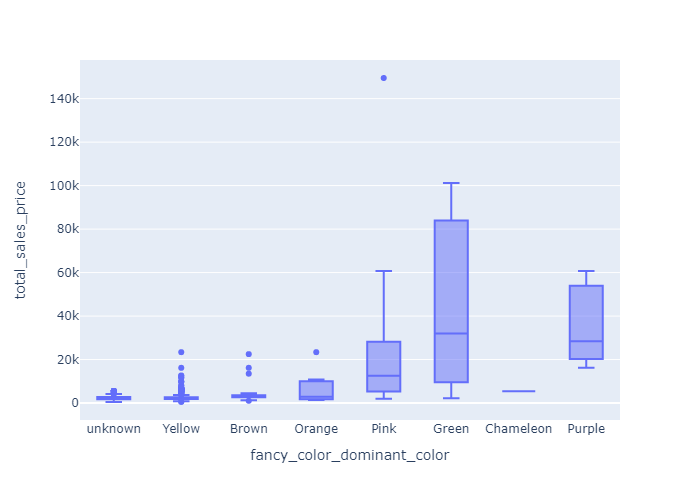

In [62]:
fig1 = px.box(median_cttw, x='fancy_color_dominant_color', y='total_sales_price')
fig1.show('png')

From above we can see that diamonds with a fancy dominant color of pink, green and purple are the rarest and therefore, are of a higher price.

Note: Assuming unknown is colorless, since unknown dominant color has an unknow secondary color as well.

In [63]:
# median_cttw[(median_cttw['fancy_color_secondary_color'] != 'unknown') & (median_cttw['fancy_color_dominant_color'] == 'unknown')]

So there are diamonds that have a dominant color and no secondary color, but not diamonds that have a secondarry color and no dominant color.  

In [64]:
median_cttw_colorless = median_cttw[median_cttw['fancy_color_dominant_color']=='unknown']

In [65]:
median_cttw_colorless.head()

,index,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category,color_scale,clarity_category,clarity_scale,clarity_scale_category,cut_quality_category,culet_size_category,girdle_min_category,girdle_max_category,eye_clean_category,polish_category,symmetry_category
0,1022,Oval,M,VS2,0.5,unknown,GIA,Very Good,Excellent,unknown,N,unknown,66.8,56.0,5.85,4.42,2.95,TK,VTK,Blue,Strong,unknown,unknown,unknown,unknown,480,M,NaN,faint,VS2,VS,VS,NaN,N,TK,VTK,NaN,Excellent,Very Good
1,1374,Round,M,I1,0.5,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,0.0,0.0,5.09,5.13,3.10,unknown,unknown,unknown,Very Slight,unknown,unknown,unknown,unknown,496,M,NaN,faint,I1,I,I,Excellent,NaN,NaN,NaN,NaN,Very Good,Very Good
2,1427,Round,L,I1,0.5,Excellent,IGI,Excellent,Excellent,unknown,unknown,unknown,61.5,54.5,5.10,5.12,3.14,M,M,unknown,NaN,unknown,unknown,unknown,unknown,498,L,NaN,faint,I1,I,I,Excellent,NaN,M,M,NaN,Excellent,Excellent
3,4787,Round,M,SI2,0.5,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,58.8,61.0,5.15,5.22,3.04,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,534,M,NaN,faint,SI2,SI,SI,Excellent,NaN,NaN,NaN,NaN,Very Good,Very Good
4,5448,Round,M,I1,0.5,Very Good,GIA,Very Good,Excellent,Yes,unknown,unknown,64.4,56.0,4.93,4.98,3.19,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,568,M,NaN,faint,I1,I,I,Very Good,NaN,NaN,NaN,Yes,Excellent,Very Good


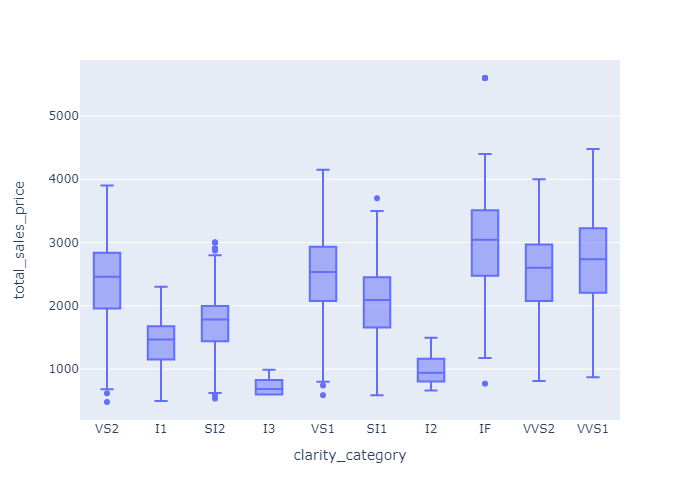

In [66]:
fig3 = px.box(median_cttw_colorless, x='clarity_category', y='total_sales_price')
fig3.show('png')

The boxplots above makes sense as the median prices for these categories increase in this order: Included, Slightly Included, Very Slightly Included, Very Very Slightly Incuded and Internally Flawless.

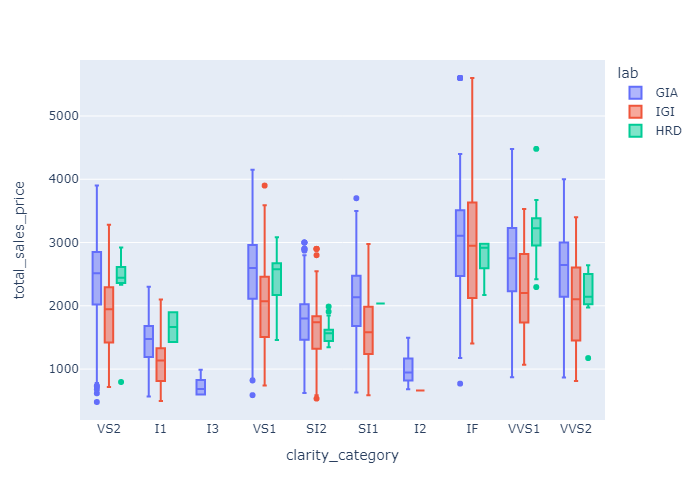

In [67]:
fig4 = px.box(median_cttw_colorless, x='clarity_category', y='total_sales_price', color='lab')
fig4.show('png')

Prices for categories, and comparing the 3 labs:
- For all the corresponding categories, IGI prices the diamonds lower than GIA.
- No solid conclusions can be made for the HRD lab.

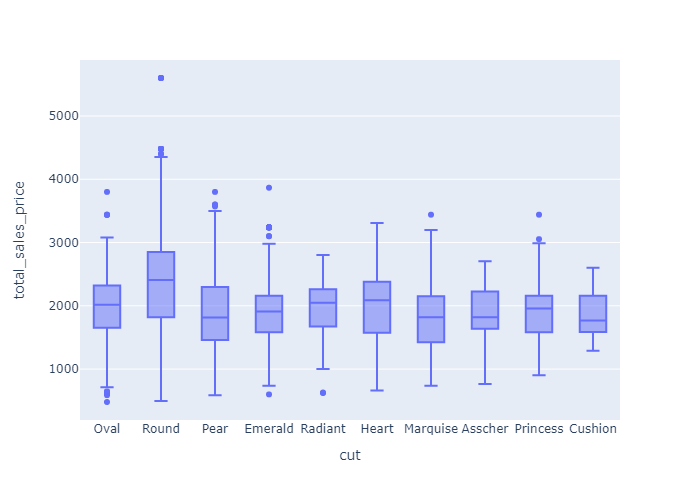

In [68]:
fig6 = px.box(median_cttw_colorless, x='cut', y='total_sales_price')
fig6.show('png')

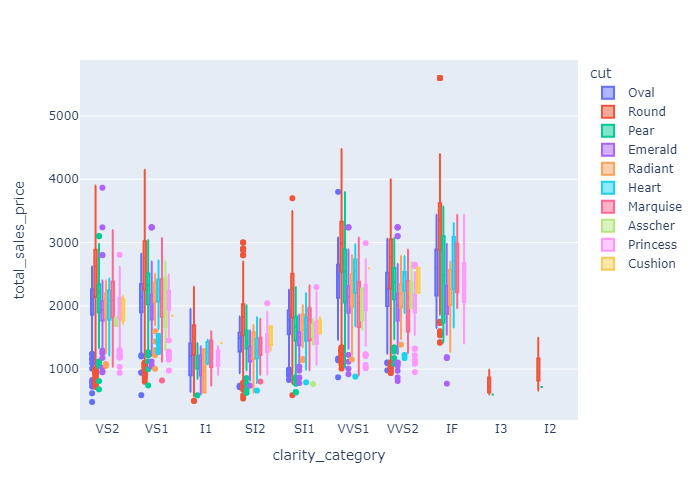

In [69]:
fig5 = px.box(median_cttw_colorless, x='clarity_category', y='total_sales_price', color='cut')
fig5.show('png')

In [70]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,color_category,fancy_color_intensity_category,color_scale,clarity_category,clarity_scale,clarity_scale_category,cut_quality_category,culet_size_category,girdle_min_category,girdle_max_category,eye_clean_category,polish_category,symmetry_category
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200,E,NaN,colorless,VVS2,VVS,VVS,Excellent,N,M,M,NaN,Very Good,Very Good
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200,E,NaN,colorless,VVS2,VVS,VVS,Very Good,N,STK,STK,NaN,Very Good,Very Good
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200,E,NaN,colorless,VVS2,VVS,VVS,Excellent,NaN,TN,M,NaN,Very Good,Very Good
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200,E,NaN,colorless,VVS2,VVS,VVS,Excellent,NaN,M,STK,NaN,Very Good,Very Good
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200,E,NaN,colorless,VVS2,VVS,VVS,Very Good,N,STK,STK,NaN,Excellent,Very Good


In [75]:
df.to_pickle('data/diamonds_cleaned.pkl')

## Correlation and Feature Selection for Prediction

#### Dealing with categorical variables.

In [72]:
from sklearn.preprocessing import OneHotEncoder


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215823 entries, 0 to 219702
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   cut                             215823 non-null  object  
 1   color                           215823 non-null  object  
 2   clarity                         215823 non-null  object  
 3   carat_weight                    215823 non-null  float64 
 4   cut_quality                     215823 non-null  object  
 5   lab                             215823 non-null  object  
 6   symmetry                        215823 non-null  object  
 7   polish                          215823 non-null  object  
 8   eye_clean                       215823 non-null  object  
 9   culet_size                      215823 non-null  object  
 10  culet_condition                 215823 non-null  object  
 11  depth_percent                   215823 non-null  float64 
 12  table_p

The How
Ordinal encoding works by mapping each unique category value to a different integer. Typically, integers start at 0 and increase by 1 for each additional category.

For example, a “size” variable with values [“small”, “medium”, “large”] would be mapped to [0, 1, 2]. The ordinal relationships are maintained — “small” < “medium” < “large”.
https://medium.com/@WojtekFulmyk/ordinal-encoding-a-brief-explanation-a29cf374dbc1

One Hot Encoding for Nominal categorical

Split data into X, y and into training and testing. Then fit the encoder.

In [74]:
encoder = OneHotEncoder()
